In [41]:
import openpyxl
from openpyxl import load_workbook

import networkx as nx
import matplotlib as mpl # Graficador
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

nc = 5

libro = openpyxl.load_workbook('formulario.xlsx' ,data_only=True)

hoja = libro.active

##[fila] [columnas
##las filas no inician de 0 si no de 1

nf = hoja.max_row
print(nf)

position = 'E'
position += str(nf)

celdas = hoja['A2' : position]

matriz =[]

for fila in celdas:
    persona = [celda.value for celda in fila]
    matriz.append(persona)
    


def similitudes(palabra1, palabra2):
    conter = 0
    pal1 = []
    pal2 = []
    aux=""
    for i in palabra1:
        if (i == ' ' and aux == ""):
            continue
        elif(i != ','):
            aux += i
        else:
            pal1.append(aux)
            aux = ""
    if(aux != ""):
        pal1.append(aux)
    aux = ""
    for i in palabra2:
        if (i == ' ' and aux == ""):
            continue
        elif(i != ','):
            aux += i
        else:
            pal2.append(aux)
            aux = ""
    if(aux != ""):
        pal2.append(aux)
    
    for sim in pal1:
        if(sim in pal2):
            conter +=1
    return conter
            
        

relaciones = []
for i in range(nf-1):
    numeros = [0 for j in range(nf-1)]
    relaciones.append(numeros)


for fila in range(nf-1):
    palabra1 = ""
    for colExcel in range(1,4):
        if(matriz[fila][colExcel] == None):
            continue
        else:
            palabra1 +=matriz[fila][colExcel] +", "
    for col in range(nf-1):
        palabra2 = ""
        if(col == fila):
            relaciones[fila][col] = 0
            continue
        for colExcel in range(1,4):
            if(matriz[col][colExcel] == None):
                continue
            else:
                palabra2 +=matriz[col][colExcel] +", "
        relaciones[fila][col] = similitudes(palabra1, palabra2)
                

print("Lista de personas:\n")
            
for person in range(nf-1):
    print(person+1, ". ", matriz[person][0], sep='')
print("\n")

print("Matriz de adyacencia: \n")

for i in range(nf+1):
     print(("───").center(3), end= '')
print()


print("   ║", end='')
for i in range(nf-1):
    if(i<10):
        print((' ' + str(i+1)).center(3), end= '')
    else:
        print(str(i+1).center(3), end= '')
print()
        
for i in range(nf+1):
     print(("───").center(3), end= '')
print()

for fila in range(nf-1):
    print(str(fila+1).center(2),"║",end='')
    for col in range(nf-1):
        if(relaciones[fila-1][col]<10):
            print((' ' + str(relaciones[fila][col])).center(3), end= '')
        else:
            print(str(relaciones[fila-1][col]).center(3), end= '')
    print(" ║")

for i in range(nf+1):
     print(("───").center(3), end= '')
print()
 
print(relaciones)

8
Lista de personas:

1. Gabriel
2. Felipe 
3. MJ
4. Jonathan 
5. Maria Fernanda Aragón Bautista 
6. Julián
7. Pipe


Matriz de adyacencia: 

───────────────────────────
   ║  1  2  3  4  5  6  7
───────────────────────────
1  ║  0  8  3  2  5  4  7 ║
2  ║  8  0  2  1  6  2  5 ║
3  ║  3  2  0  2  0  1  3 ║
4  ║  2  1  2  0  1  2  3 ║
5  ║  5  6  0  1  0  1  5 ║
6  ║  4  2  1  2  1  0  2 ║
7  ║  7  5  3  3  5  2  0 ║
───────────────────────────
[[0, 8, 3, 2, 5, 4, 7], [8, 0, 2, 1, 6, 2, 5], [3, 2, 0, 2, 0, 1, 3], [2, 1, 2, 0, 1, 2, 3], [5, 6, 0, 1, 0, 1, 5], [4, 2, 1, 2, 1, 0, 2], [7, 5, 3, 3, 5, 2, 0]]


In [42]:
def canGustos(fila):
    palabra = ""
    counter = 0
    for colExcel in range(1,4):
        if(matriz[fila][colExcel] == None):
            continue
        else:
            palabra +=matriz[fila][colExcel] +", "
    
    for car in palabra:
        if(car == ','):
            counter += 1
    return (counter -1)

grafo = nx.Graph()
nodos = []
for fila in range(nf-1):
    nodos.append(nodo(str(matriz[fila][0]), int(canGustos(fila)), int(fila+1)))

grafo.add_nodes_from(nodos)

In [43]:
for fila in range(nf-1):
    for col in range(nf-1):
        if(relaciones[fila][col] != 0):
            color = ""
            grafo.add_edge(nodos[fila], nodos[col], weight=relaciones[fila][col])

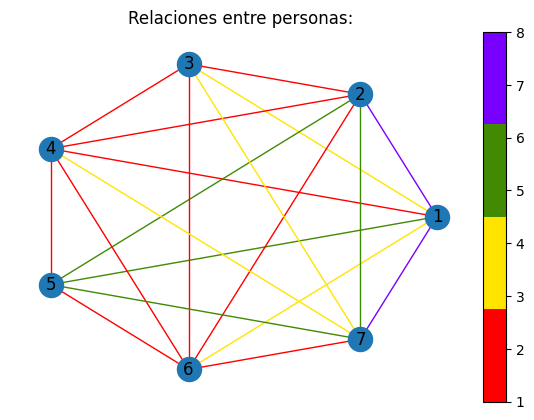

In [44]:
plt.subplot()
pos = nx.layout.circular_layout(grafo)
c = ["#FF0000","#FFE400","#428A02","#7800FF"]  
colores = []
for (u,v) in grafo.edges:
        if(grafo[u][v]['weight'] == 1 or grafo[u][v]['weight']==2):
            colores.append("#FF0000")
        elif(grafo[u][v]['weight'] == 3 or grafo[u][v]['weight'] == 4):
            colores.append("#FFE400")
        elif(grafo[u][v]['weight'] == 5 or grafo[u][v]['weight'] == 6):
            colores.append("#428A02")
        elif(grafo[u][v]['weight'] >= 7):
            colores.append( "#7800FF")
nx.draw(grafo,pos=pos,edge_color=colores,edge_cmap=plt.cm.rainbow)
nx.draw_networkx_labels(grafo, pos)

plt.title("Relaciones entre personas: ")

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)

cmap = mpl.colors.ListedColormap(c)
bounds = [0, 3, 5, 7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

pesosw = list([grafo[u][v]['weight'] for (u, v) in grafo.edges()])
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.ColorbarBase(ax=ax_cb, cmap=cmap, norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb)


plt.show()

In [45]:
#Los siguientes vectores almacenan las parejas de personas de acuerdo con su compatibilidad, donde compB es baja, compM es media, compA es alta, compMa es MUY ALTA

compB = []
compM = []
compA = []
compMa = []

for i in range(7):
    for j in range(i+1, 7):   #Se inicia desde i+1 para que no se lea la matriz completa sino solo el triangulo superior que tiene los mismos datos que el inferior
        if(relaciones[i][j] <= 2 and relaciones[i][j] != 0 ):
            compB.append(str(celdas[i][0].value) + "-" +str(celdas[j][0].value))
        elif(relaciones[i][j] <= 4 and relaciones[i][j] != 0 ):
            compM.append(str(celdas[i][0].value) + "-" +str(celdas[j][0].value))
        elif(relaciones[i][j] <= 6 and relaciones[i][j] != 0 ):
            compA.append(str(celdas[i][0].value) + "-" +str(celdas[j][0].value))
        elif(relaciones[i][j] != 0 ):
            compMa.append(str(celdas[i][0].value) + "-" +str(celdas[j][0].value))
print(compB)
print(compM)
print(compA)
print(compMa)

['Gabriel-Jonathan ', 'Felipe -MJ', 'Felipe -Jonathan ', 'Felipe -Julián', 'MJ-Jonathan ', 'MJ-Julián', 'Jonathan -Maria Fernanda Aragón Bautista ', 'Jonathan -Julián', 'Maria Fernanda Aragón Bautista -Julián', 'Julián-Pipe']
['Gabriel-MJ', 'Gabriel-Julián', 'MJ-Pipe', 'Jonathan -Pipe']
['Gabriel-Maria Fernanda Aragón Bautista ', 'Felipe -Maria Fernanda Aragón Bautista ', 'Felipe -Pipe', 'Maria Fernanda Aragón Bautista -Pipe']
['Gabriel-Felipe ', 'Gabriel-Pipe']
